## 1. Explore the data

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Load data
users_df = pd.read_csv('./data/USER_TAKEHOME.csv')
products_df = pd.read_csv('./data/PRODUCTS_TAKEHOME.csv')
transactions_df = pd.read_csv('./data/TRANSACTION_TAKEHOME.csv')


### 1a. Data quality issues

#### Users table

##### Overall

In [3]:
users_df.head(10)

,ID,CREATED_DATE,BIRTH_DATE,STATE,LANGUAGE,GENDER
0,5ef3b4f17053ab141787697d,2020-06-24 20:17:54.000 Z,2000-08-11 00:00:00.000 Z,CA,es-419,female
1,5ff220d383fcfc12622b96bc,2021-01-03 19:53:55.000 Z,2001-09-24 04:00:00.000 Z,PA,en,female
2,6477950aa55bb77a0e27ee10,2023-05-31 18:42:18.000 Z,1994-10-28 00:00:00.000 Z,FL,es-419,female
3,658a306e99b40f103b63ccf8,2023-12-26 01:46:22.000 Z,NaN,NC,en,NaN
4,653cf5d6a225ea102b7ecdc2,2023-10-28 11:51:50.000 Z,1972-03-19 00:00:00.000 Z,PA,en,female
5,5fe2b6f3ad416a1265c4ab68,2020-12-23 03:18:11.000 Z,1999-10-27 04:00:00.000 Z,NY,en,female
6,651210546816bb4d035b1ead,2023-09-25 22:57:24.000 Z,1983-09-25 22:57:25.000 Z,FL,es-419,male
7,642831ea3d4434e63c1936fd,2023-04-01 13:30:18.000 Z,1970-02-16 05:00:00.000 Z,IN,en,female
8,63a4c9a1b5f32149b9d82f9e,2022-12-22 21:18:25.000 Z,1982-12-22 05:00:00.000 Z,NC,en,female
9,63654b21d02459d8a57a2e2c,2022-11-04 17:25:53.000 Z,1992-05-03 04:00:00.000 Z,NY,en,non_binary


In [4]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   ID            100000 non-null  object
 1   CREATED_DATE  100000 non-null  object
 2   BIRTH_DATE    96325 non-null   object
 3   STATE         95188 non-null   object
 4   LANGUAGE      69492 non-null   object
 5   GENDER        94108 non-null   object
dtypes: object(6)
memory usage: 4.6+ MB


There are some null values, and the data type could be modified, such as datetime for date related columns

In [5]:
# Check if there is any null value in each column
users_df.isnull().sum()

ID                  0
CREATED_DATE        0
BIRTH_DATE       3675
STATE            4812
LANGUAGE        30508
GENDER           5892
dtype: int64

There are some null values in BITRTH_DATE, STATE, LANGUAGE and GENDER.

In [6]:
# Create a copy to clean the users dataframe
clean_users_df = users_df.copy()

##### ID

In [7]:
# Check if there is any duplicated value in ID column
clean_users_df.ID.duplicated().sum()

0

There is no duplicated value and missing value in ID.

##### CREATED_DATETIME

**Data quality issue #1**: CREATED_DATETIME should be in `datetime` data type instead of `string`. 

In [8]:
# Change format of CREATED_DATE and create a new column to store the data
clean_users_df['CREATED_DATE'] = pd.to_datetime(clean_users_df.CREATED_DATE, errors='coerce') 
# returns 'NaT' if not a time

In [9]:
clean_users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype              
---  ------        --------------   -----              
 0   ID            100000 non-null  object             
 1   CREATED_DATE  100000 non-null  datetime64[ns, UTC]
 2   BIRTH_DATE    96325 non-null   object             
 3   STATE         95188 non-null   object             
 4   LANGUAGE      69492 non-null   object             
 5   GENDER        94108 non-null   object             
dtypes: datetime64[ns, UTC](1), object(5)
memory usage: 4.6+ MB


##### BIRTH_DATE

**Data quality issue #2**: BIRTH_DATE should be in `datetime` data type instead of `string`. 

In [10]:
# Extract date only from BIRTH_DATE and create a new column to store the data
clean_users_df['BIRTH_DATE'] = pd.to_datetime(clean_users_df.BIRTH_DATE, errors='coerce')
# returns 'NaT' if not a time

In [11]:
clean_users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype              
---  ------        --------------   -----              
 0   ID            100000 non-null  object             
 1   CREATED_DATE  100000 non-null  datetime64[ns, UTC]
 2   BIRTH_DATE    96325 non-null   datetime64[ns, UTC]
 3   STATE         95188 non-null   object             
 4   LANGUAGE      69492 non-null   object             
 5   GENDER        94108 non-null   object             
dtypes: datetime64[ns, UTC](2), object(4)
memory usage: 4.6+ MB


In [12]:
clean_users_df

,ID,CREATED_DATE,BIRTH_DATE,STATE,LANGUAGE,GENDER
0,5ef3b4f17053ab141787697d,2020-06-24 20:17:54+00:00,2000-08-11 00:00:00+00:00,CA,es-419,female
1,5ff220d383fcfc12622b96bc,2021-01-03 19:53:55+00:00,2001-09-24 04:00:00+00:00,PA,en,female
2,6477950aa55bb77a0e27ee10,2023-05-31 18:42:18+00:00,1994-10-28 00:00:00+00:00,FL,es-419,female
3,658a306e99b40f103b63ccf8,2023-12-26 01:46:22+00:00,NaT,NC,en,NaN
4,653cf5d6a225ea102b7ecdc2,2023-10-28 11:51:50+00:00,1972-03-19 00:00:00+00:00,PA,en,female
...,...,...,...,...,...,...
99995,61fc06d41febf771966da8fa,2022-02-03 16:46:12+00:00,1992-03-16 08:00:00+00:00,CA,en,female
99996,6391e7ef90ad5449ec5f782d,2022-12-08 13:34:39+00:00,1993-09-23 05:00:00+00:00,MO,en,female
99997,637d5efdd6f2a49c49934dcb,2022-11-22 23:45:05+00:00,1983-04-19 00:00:00+00:00,RI,en,female
99998,5f0de23b05d8a6147dc0cafa,2020-07-14 16:50:04+00:00,1995-06-09 04:00:00+00:00,DE,en,female


There are also missing values in BIRTH_DATE. But if users didn't provide their BIRTH_DATE, we could not do anything about it. We should not remove the rows or impute the values.

Since we changed the data type of BIRTH_DATE as datetime, when there is a non-datetime value, ie NaN, it would result in a null value. Therefore there are some null values in BIRTH_DATE column.

Since we have the BIRTH_DATE of our users, we can look into the demographic of our users.

In [145]:
from datetime import datetime

# create AGE column
today = datetime.today()

clean_users_df['AGE'] = clean_users_df['BIRTH_DATE'].apply(
    lambda x: today.year - x.year - ((today.month, today.day) < (x.month, x.day)) if pd.notnull(x) else None)

clean_users_df[['BIRTH_DATE', 'AGE']].head()

,BIRTH_DATE,AGE
0,2000-08-11 00:00:00+00:00,24.0
1,2001-09-24 04:00:00+00:00,23.0
2,1994-10-28 00:00:00+00:00,30.0
3,NaT,NaN
4,1972-03-19 00:00:00+00:00,52.0


In [146]:
# change the data type of AGE column to integer
clean_users_df['AGE'] = clean_users_df['AGE'].astype('Int64')

In [14]:
# define function to categorize users into different age groups
def categorize_age(age:float) -> str:
    """
    Create mapping for age column, this could be further extended if more 
    accurate analysis is required

    Parameters:
    age (float): Age value to be recognised for age group.

    Returns:
    str: Formatted age group
    """
    if age is None or pd.isnull(age):
        return "Unknown"
    elif age < 18:
        return "< 18"
    elif age <= 30:
        return "18 - 30"
    elif age <= 40:
        return "31 - 40"
    elif age <= 50:
        return "41 - 50"
    else:
        return "> 50"

In [15]:
# apply the function defined above
clean_users_df['AGE_GROUP'] = clean_users_df['AGE'].apply(categorize_age)

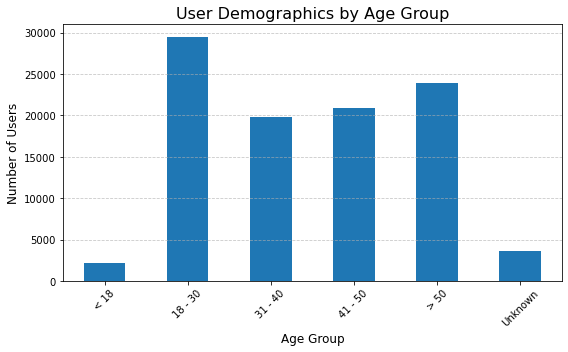

In [16]:
# visualize users' demographic
import matplotlib.pyplot as plt

age_group_order = ["< 18", "18 - 30", "31 - 40", "41 - 50", "> 50", 'Unknown']

age_group_counts = clean_users_df['AGE_GROUP'].value_counts().reindex(age_group_order)


# plot the demographic distribution
plt.figure(figsize=(8, 5))
age_group_counts.plot(kind='bar')
plt.title("User Demographics by Age Group", fontsize=16)
plt.xlabel("Age Group", fontsize=12)
plt.ylabel("Number of Users", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

We can see that most of our users belong to the age group 18 - 30, while the second largest age group is > 50. We have a broad range of target users from younger generation to older generation.

##### STATE

**Data quality issue #3**: Categorical columns (ie STATE, LANGUAGE, GENDER) have missing values. Their data formats could be modified to category for better analysis efficiency

In [17]:
# Fill null values with 'unknown' for categorical columns
clean_users_df.fillna({
    'STATE': 'unknown',
    'LANGUAGE': 'unknown',
    'GENDER': 'unknown'
}, inplace=True)

In [18]:
clean_users_df.STATE.value_counts().index

Index(['TX', 'FL', 'CA', 'NY', 'unknown', 'IL', 'GA', 'PA', 'OH', 'NC', 'NJ',
       'MI', 'VA', 'IN', 'TN', 'AL', 'SC', 'KY', 'AZ', 'MO', 'MD', 'MA', 'WI',
       'PR', 'LA', 'WA', 'CO', 'MN', 'CT', 'OK', 'AR', 'MS', 'IA', 'NV', 'KS',
       'OR', 'WV', 'UT', 'DE', 'NE', 'NM', 'ME', 'NH', 'HI', 'ID', 'AK', 'RI',
       'DC', 'SD', 'ND', 'MT', 'WY', 'VT'],
      dtype='object', name='STATE')

In [19]:
# number of unique values in STATE
clean_users_df.STATE.nunique()

53

Including Unknown, DC and PR (Puerto Rico), 53 values in STATE is correct. The format is also correct with two letters.

In [20]:
# change data type of GENDER to category to improve efficiency for analysis. 
# Could consider using ENUM when importing data into data warehouse
clean_users_df['STATE'] = clean_users_df['STATE'].astype('category')

In [21]:
clean_users_df.STATE.value_counts()

STATE
TX         9028
FL         8921
CA         8589
NY         5703
unknown    4812
IL         3794
GA         3718
PA         3644
OH         3519
NC         3399
NJ         2899
MI         2582
VA         2400
IN         2213
TN         2165
AL         1792
SC         1773
KY         1731
AZ         1728
MO         1652
MD         1636
MA         1523
WI         1389
PR         1361
LA         1290
WA         1234
CO         1139
MN         1125
CT         1110
OK         1100
AR         1011
MS          960
IA          933
NV          837
KS          835
OR          700
WV          674
UT          593
DE          492
NE          487
NM          452
ME          368
NH          359
HI          350
ID          350
AK          297
RI          284
DC          241
SD          205
ND          185
MT          169
WY          138
VT          111
Name: count, dtype: int64

##### LANGUAGE

In [22]:
clean_users_df.LANGUAGE.value_counts()

LANGUAGE
en         63403
unknown    30508
es-419      6089
Name: count, dtype: int64

Since the format seems fine, and 'es-419' is also an official language code of Spanish for Latin America and Caribbean, I would preserve the original input for this column.

In [23]:
# change data type of LANGUAGE to category to improve efficiency for analysis. 
# Could consider using ENUM when importing data into data warehouse
clean_users_df['LANGUAGE'] = clean_users_df['LANGUAGE'].astype('category')

##### GENDER

In [24]:
clean_users_df.GENDER.value_counts()

GENDER
female                    64240
male                      25829
unknown                    6088
transgender                1772
prefer_not_to_say          1350
non_binary                  473
not_listed                  180
Non-Binary                   34
not_specified                28
My gender isn't listed        5
Prefer not to say             1
Name: count, dtype: int64

It seems that the answer is from a list of provided genders, ie 'female', 'male', 'non_binary'. There are some users choosing 'prefer not to say'. I would categorize the column's answer into 'female', 'male', 'transgender', 'non_binary', and replace 'not_listed' with 'other', and replace remaining answers with 'unspecified'.

In [25]:
# define a function to format the GENDER column
def format_gender(value:str) -> str:
    """
    Create mapping for input in GENDER column, this could be further extended systematically if there 
    are new input values.

    Parameters:
    value (str): Gender value to format.

    Returns:
    str: Formatted gender category
    """
    if value in ['female', 'male', 'transgender', 'non_binary', 'Non-Binary']:
        return value.lower() if value != 'Non-Binary' else 'non_binary'
    elif value == 'not_listed':
        return 'others'
    elif value in ['unknown', 'prefer_not_to_say', 'not_specified', "My gender isn't listed", 'Prefer not to say']:
        return 'not_specified'
    else:
        return 'others'

In [26]:
# apply format_gender function to GENDER column
clean_users_df['GENDER'] = clean_users_df.GENDER.apply(lambda x:format_gender(x))

In [27]:
# change data type of GENDER to category to improve efficiency for analysis. 
# Could consider using ENUM when importing data into data warehouse
clean_users_df['GENDER'] = clean_users_df['GENDER'].astype('category')

In [28]:
clean_users_df['GENDER'].value_counts()

GENDER
female           64240
male             25829
not_specified     7472
transgender       1772
non_binary         507
others             180
Name: count, dtype: int64

Again we can visualize our users' demographic in terms of the gender

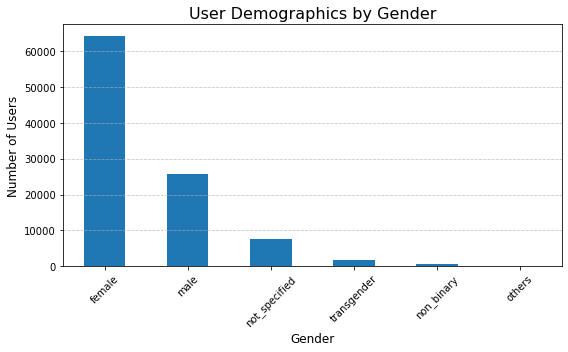

In [29]:
gender_counts = clean_users_df['GENDER'].value_counts()

# plot the demographic distribution with the x-axis in the desired order
plt.figure(figsize=(8, 5))
gender_counts.plot(kind='bar')

plt.title("User Demographics by Gender", fontsize=16)
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Number of Users", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

We can see that female takes up most of our user base.

In [30]:
clean_users_df.head()

,ID,CREATED_DATE,BIRTH_DATE,STATE,LANGUAGE,GENDER,AGE,AGE_GROUP
0,5ef3b4f17053ab141787697d,2020-06-24 20:17:54+00:00,2000-08-11 00:00:00+00:00,CA,es-419,female,24.0,18 - 30
1,5ff220d383fcfc12622b96bc,2021-01-03 19:53:55+00:00,2001-09-24 04:00:00+00:00,PA,en,female,23.0,18 - 30
2,6477950aa55bb77a0e27ee10,2023-05-31 18:42:18+00:00,1994-10-28 00:00:00+00:00,FL,es-419,female,30.0,18 - 30
3,658a306e99b40f103b63ccf8,2023-12-26 01:46:22+00:00,NaT,NC,en,not_specified,NaN,Unknown
4,653cf5d6a225ea102b7ecdc2,2023-10-28 11:51:50+00:00,1972-03-19 00:00:00+00:00,PA,en,female,52.0,> 50


In [31]:
clean_users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype              
---  ------        --------------   -----              
 0   ID            100000 non-null  object             
 1   CREATED_DATE  100000 non-null  datetime64[ns, UTC]
 2   BIRTH_DATE    96325 non-null   datetime64[ns, UTC]
 3   STATE         100000 non-null  category           
 4   LANGUAGE      100000 non-null  category           
 5   GENDER        100000 non-null  category           
 6   AGE           96325 non-null   float64            
 7   AGE_GROUP     100000 non-null  object             
dtypes: category(3), datetime64[ns, UTC](2), float64(1), object(2)
memory usage: 4.1+ MB


We did the followings:

1. Change the data type of most columns for improved efficiency for analysis. For categorical columns, we could consider changing the data type of certain columns as ENUM when importing to a data warehouse.
2. Fill null values with 'unknown' for categorical columns to improve completeness and enhance analysis.
3. Categorize GENDER column into a few categories, namely female, male, transgender, non_binary, not_specified, and others, while unknown is included in not specified.

#### Products table

##### Overall

In [32]:
products_df.head(10)

,CATEGORY_1,CATEGORY_2,CATEGORY_3,CATEGORY_4,MANUFACTURER,BRAND,BARCODE
0,Health & Wellness,Sexual Health,Conductivity Gels & Lotions,NaN,NaN,NaN,7.964944e+11
1,Snacks,Puffed Snacks,Cheese Curls & Puffs,NaN,NaN,NaN,2.327801e+10
2,Health & Wellness,Hair Care,Hair Care Accessories,NaN,PLACEHOLDER MANUFACTURER,ELECSOP,4.618178e+11
3,Health & Wellness,Oral Care,Toothpaste,NaN,COLGATE-PALMOLIVE,COLGATE,3.500047e+10
4,Health & Wellness,Medicines & Treatments,Essential Oils,NaN,MAPLE HOLISTICS AND HONEYDEW PRODUCTS INTERCHA...,MAPLE HOLISTICS,8.068109e+11
5,Health & Wellness,Hair Care,Hair Care Accessories,NaN,PLACEHOLDER MANUFACTURER,BEAUHAIR,6.626585e+11
6,Health & Wellness,Medicines & Treatments,Vitamins & Herbal Supplements,NaN,HALEON,EMERGEN-C,6.177376e+11
7,Health & Wellness,Deodorant & Antiperspirant,Men's Deodorant & Antiperspirant,NaN,NaN,NaN,7.501839e+12
8,Snacks,Snack Bars,Granola Bars,NaN,HYVEE INC,HY-VEE,7.545013e+10
9,Health & Wellness,NaN,NaN,NaN,CHURCH & DWIGHT,REPHRESH,NaN


In [33]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 845552 entries, 0 to 845551
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   CATEGORY_1    845441 non-null  object 
 1   CATEGORY_2    844128 non-null  object 
 2   CATEGORY_3    784986 non-null  object 
 3   CATEGORY_4    67459 non-null   object 
 4   MANUFACTURER  619078 non-null  object 
 5   BRAND         619080 non-null  object 
 6   BARCODE       841527 non-null  float64
dtypes: float64(1), object(6)
memory usage: 45.2+ MB


In [34]:
# Create a copy to clean the users dataframe
clean_products_df = products_df.copy()

**Data quality issue #4**: There are duplicated rows in products dataset. 

In [35]:
# check for duplicated products
clean_products_df.duplicated().sum()

215

Since the product table should not have any duplicated value, ie identical products, we should remove the duplicated rows

In [36]:
# drop duplicated rows
clean_products_df = clean_products_df.drop_duplicates()
# reset index
clean_products_df = clean_products_df.reset_index(drop=True)

In [37]:
# verify results
clean_products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 845337 entries, 0 to 845336
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   CATEGORY_1    845226 non-null  object 
 1   CATEGORY_2    843915 non-null  object 
 2   CATEGORY_3    784774 non-null  object 
 3   CATEGORY_4    67453 non-null   object 
 4   MANUFACTURER  618873 non-null  object 
 5   BRAND         618875 non-null  object 
 6   BARCODE       841369 non-null  float64
dtypes: float64(1), object(6)
memory usage: 45.1+ MB


##### CATEGORY_1 - CATEGORY_4

**Data quality issue #5**: Categorical columns' (ie CATEGORY_1, CATEGORY_2, CATEGORY_3, CATEGORY_4) data type could be modified to category for better analysis efficiency.

There are some null values, and the data type could be modified for better efficient storage and processing.
However for null values in this table, we should not remove it nor impute the values as it would affect the information about the products. For example, a missing value in CATEGORY_3 or CATEGORY_4 doesn't mean there is any problem with the product, but the main category is already sufficient to represent the product.

In [38]:
clean_products_df.CATEGORY_1.describe()

count                845226
unique                   27
top       Health & Wellness
freq                 512686
Name: CATEGORY_1, dtype: object

In [39]:
clean_products_df.CATEGORY_2.describe()

count     843915
unique       121
top        Candy
freq      120898
Name: CATEGORY_2, dtype: object

In [40]:
clean_products_df.CATEGORY_3.describe()

count               784774
unique                 344
top       Confection Candy
freq                 56951
Name: CATEGORY_3, dtype: object

In [41]:
clean_products_df.CATEGORY_4.describe()

count         67453
unique          127
top       Lip Balms
freq           9737
Name: CATEGORY_4, dtype: object

Since there are many categories in each category with many products, and categories should not be updated very frequently, it is better to change the data type to category to improve efficiency for analysis. We could also use ENUM when importing the data into a data warehouse.

In [42]:
# change data type of CATEGORY_1 - CATEGORY_4 to category to improve efficiency for analysis. 
# Could consider using ENUM when importing data into data warehouse
categorical_columns = ['CATEGORY_1', 'CATEGORY_2', 'CATEGORY_3', 'CATEGORY_4']
clean_products_df[categorical_columns] = clean_products_df[categorical_columns].astype('category')

In [43]:
clean_products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 845337 entries, 0 to 845336
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   CATEGORY_1    845226 non-null  category
 1   CATEGORY_2    843915 non-null  category
 2   CATEGORY_3    784774 non-null  category
 3   CATEGORY_4    67453 non-null   category
 4   MANUFACTURER  618873 non-null  object  
 5   BRAND         618875 non-null  object  
 6   BARCODE       841369 non-null  float64 
dtypes: category(4), float64(1), object(2)
memory usage: 24.2+ MB


I also noticed that the distribution of products from CATEGORY_1 to CATEGORY_4 are heavily skewed. The 'Health & Wellness' category dominates with significantly more products compared with other categories.

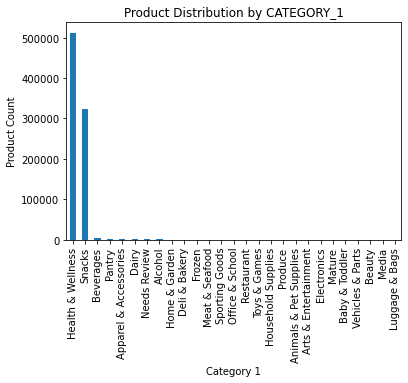

In [105]:
# visualize the skewness of product distribution
clean_products_df['CATEGORY_1'].value_counts().plot(kind='bar')
plt.title('Product Distribution by CATEGORY_1')
plt.xlabel('Category 1')
plt.ylabel('Product Count')
plt.show()


We can apply log scale so that it can compress the range and reveal the patterns in categories with lower product counts. 

/var/folders/d8/pj899s_x1_lbj5g5h4ldf5k80000gn/T/ipykernel_48974/837815666.py:15: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout(rect=[0, 0, 1, 0.95])


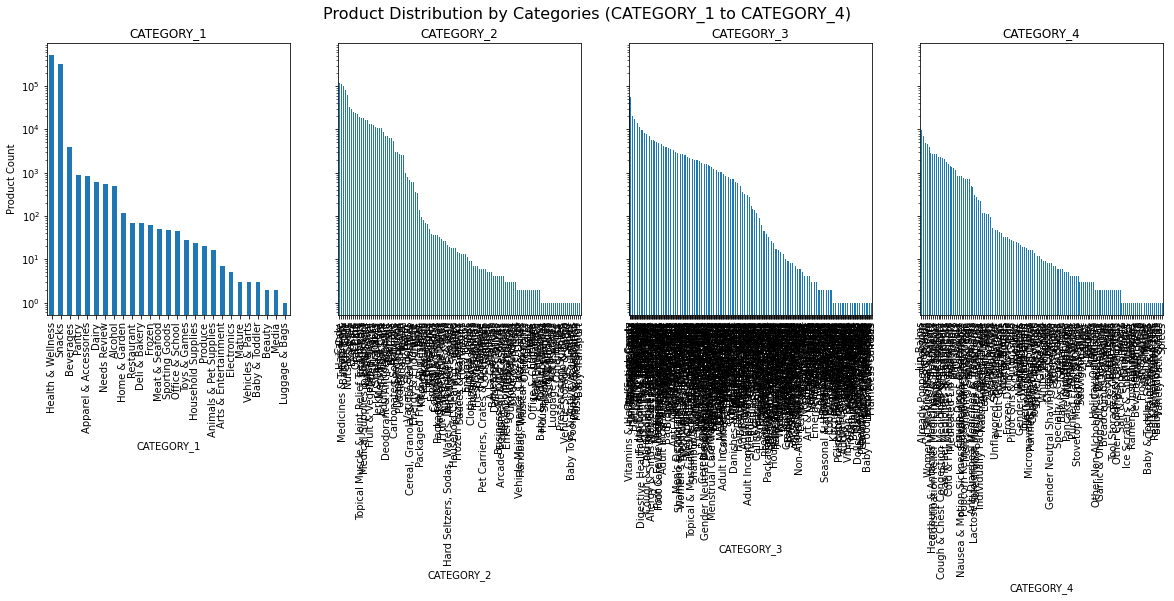

In [114]:
# visualize the skewness of product distribution acoss CATEGORY_1 to CATEGORY_4 using log scale
categories = ['CATEGORY_1', 'CATEGORY_2', 'CATEGORY_3', 'CATEGORY_4']

# create subplots
fig, axes = plt.subplots(1, 4, figsize=(20, 5), sharey=True)

# loop through each category and plot its distribution
for i, category in enumerate(categories):
    products_df[category].value_counts().plot(kind='bar', ax=axes[i], title=category, logy=True)
    axes[i].set_xlabel(category)
    axes[i].set_ylabel('Product Count' if i == 0 else '')  # Add y-label only for the first plot

plt.suptitle('Product Distribution by Categories (CATEGORY_1 to CATEGORY_4)', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

##### MANUFACTURER and BRAND

**Data quality issue #6**: Missing values and invalid terms in MANUFACTURER and BRAND.

This would require team effort to backfill the missing and invalid values.

**Challenging fields to understand #1**: 

Business logic between MANUFACTURER and BRAND:

While there are many missing values in both columns, many 'PLACEHOLDER MANUFACTURER' appear in MANUFACTURER, and many 'PRIVATE LABEL' appear in BRAND. They are also correlated, as shown below

In [44]:
# check for missing values in manufacturer and brand
clean_products_df.isnull().sum()

CATEGORY_1         111
CATEGORY_2        1422
CATEGORY_3       60563
CATEGORY_4      777884
MANUFACTURER    226464
BRAND           226462
BARCODE           3968
dtype: int64

It shows that there are many missing values in both MANUFACTURER and BRAND columns.

I also noticed that 'PLACEHOLDER MANUFACTURER' and 'PRIVATE LABEL' have a relationship. As shown below:

In [45]:
# products with 'PLACEHOLDER MANUFACTURER' in MANUFACTURER
clean_products_df.query('MANUFACTURER == "PLACEHOLDER MANUFACTURER"')

,CATEGORY_1,CATEGORY_2,CATEGORY_3,CATEGORY_4,MANUFACTURER,BRAND,BARCODE
2,Health & Wellness,Hair Care,Hair Care Accessories,NaN,PLACEHOLDER MANUFACTURER,ELECSOP,4.618178e+11
5,Health & Wellness,Hair Care,Hair Care Accessories,NaN,PLACEHOLDER MANUFACTURER,BEAUHAIR,6.626585e+11
11,Health & Wellness,Medicines & Treatments,Skin Treatments,NaN,PLACEHOLDER MANUFACTURER,PERRICONE MD,6.514731e+11
12,Health & Wellness,Bath & Body,Hand & Body Lotions,NaN,PLACEHOLDER MANUFACTURER,PRIVATE LABEL,1.897457e+09
15,Health & Wellness,Hair Care,Hair Tools,Hair Brushes & Combs,PLACEHOLDER MANUFACTURER,BULK BUYS,7.310151e+11
...,...,...,...,...,...,...,...
845280,Snacks,Fruit & Vegetable Snacks,Dried Fruit,NaN,PLACEHOLDER MANUFACTURER,BRAND NOT KNOWN,6.444525e+10
845303,Health & Wellness,Skin Care,Anti-Aging Skin Care Kits,NaN,PLACEHOLDER MANUFACTURER,PETER THOMAS ROTH,6.281993e+11
845318,Health & Wellness,Hair Care,Hair Tools,Hair Brushes & Combs,PLACEHOLDER MANUFACTURER,MAGIDEAL,7.036763e+11
845320,Snacks,Candy,Confection Candy,NaN,PLACEHOLDER MANUFACTURER,PRIVATE LABEL,2.000699e+12


In [46]:
# products with 'PRIVATE LABEL' in BRAND
clean_products_df.query('BRAND == "PRIVATE LABEL"')

,CATEGORY_1,CATEGORY_2,CATEGORY_3,CATEGORY_4,MANUFACTURER,BRAND,BARCODE
12,Health & Wellness,Bath & Body,Hand & Body Lotions,NaN,PLACEHOLDER MANUFACTURER,PRIVATE LABEL,1.897457e+09
56,Snacks,Crackers,Wheat Crackers,NaN,PLACEHOLDER MANUFACTURER,PRIVATE LABEL,7.088203e+11
113,Health & Wellness,Bath & Body,Hand & Body Lotions,NaN,PLACEHOLDER MANUFACTURER,PRIVATE LABEL,4.815590e+10
129,Snacks,Snack Cakes,Donut Snack Cakes,NaN,PLACEHOLDER MANUFACTURER,PRIVATE LABEL,5.254864e+10
139,Health & Wellness,Bath & Body,Hand & Body Lotions,NaN,PLACEHOLDER MANUFACTURER,PRIVATE LABEL,3.568825e+09
...,...,...,...,...,...,...,...
845150,Health & Wellness,Skin Care,Eye Creams,NaN,PLACEHOLDER MANUFACTURER,PRIVATE LABEL,8.367730e+11
845188,Snacks,Dips & Salsa,French Onion Dip,NaN,PLACEHOLDER MANUFACTURER,PRIVATE LABEL,4.173504e+10
845213,Health & Wellness,Bath & Body,Liquid Hand Soap,NaN,PLACEHOLDER MANUFACTURER,PRIVATE LABEL,4.815595e+10
845227,Health & Wellness,Bath & Body,Liquid Hand Soap,NaN,PLACEHOLDER MANUFACTURER,PRIVATE LABEL,1.661075e+08


In [47]:
# result with 'PRIVATE LABEL' in BRAND and 'PLACEHOLDER MANUFACTURER' in MANUFACTURER
clean_products_df.query('BRAND == "PRIVATE LABEL"').query('MANUFACTURER == "PLACEHOLDER MANUFACTURER"')

,CATEGORY_1,CATEGORY_2,CATEGORY_3,CATEGORY_4,MANUFACTURER,BRAND,BARCODE
12,Health & Wellness,Bath & Body,Hand & Body Lotions,NaN,PLACEHOLDER MANUFACTURER,PRIVATE LABEL,1.897457e+09
56,Snacks,Crackers,Wheat Crackers,NaN,PLACEHOLDER MANUFACTURER,PRIVATE LABEL,7.088203e+11
113,Health & Wellness,Bath & Body,Hand & Body Lotions,NaN,PLACEHOLDER MANUFACTURER,PRIVATE LABEL,4.815590e+10
129,Snacks,Snack Cakes,Donut Snack Cakes,NaN,PLACEHOLDER MANUFACTURER,PRIVATE LABEL,5.254864e+10
139,Health & Wellness,Bath & Body,Hand & Body Lotions,NaN,PLACEHOLDER MANUFACTURER,PRIVATE LABEL,3.568825e+09
...,...,...,...,...,...,...,...
845150,Health & Wellness,Skin Care,Eye Creams,NaN,PLACEHOLDER MANUFACTURER,PRIVATE LABEL,8.367730e+11
845188,Snacks,Dips & Salsa,French Onion Dip,NaN,PLACEHOLDER MANUFACTURER,PRIVATE LABEL,4.173504e+10
845213,Health & Wellness,Bath & Body,Liquid Hand Soap,NaN,PLACEHOLDER MANUFACTURER,PRIVATE LABEL,4.815595e+10
845227,Health & Wellness,Bath & Body,Liquid Hand Soap,NaN,PLACEHOLDER MANUFACTURER,PRIVATE LABEL,1.661075e+08


In [48]:
# result with 'PRIVATE LABEL' in BRAND but NOT 'PLACEHOLDER MANUFACTURER' in MANUFACTURER
clean_products_df.query('BRAND == "PRIVATE LABEL"').query('MANUFACTURER != "PLACEHOLDER MANUFACTURER"')

,CATEGORY_1,CATEGORY_2,CATEGORY_3,CATEGORY_4,MANUFACTURER,BRAND,BARCODE


It shows that whenever the BRAND is 'PRIVATE LABEL', the MANUFACTURER is 'PLACEHOLDER MANUFACTURER'. This is not the same case vice versa, but we should still preserve this relationship for further analysis by leaving their values as they are

For missing values, although there is a 'PLACEHOLDER MANUFACTURER', it is different from missing values like 'NaN'. 

We cannot simply remove the rows or impute the missing values, because it would remove or affect the information from the data.

Therefore my approach would be replacing null values in MANUFACTURER and BRAND with 'UNKNOWN MANUFACTURER' and 'UNKNOWN BRNAD'. After that it would require team effort to get the manufacturer and brand names when available. 

In [49]:
clean_products_df.query('MANUFACTURER in ["UNKNOWN", "DOES NOT APPLY", "NONE"]').MANUFACTURER.value_counts()

MANUFACTURER
NONE              4835
UNKNOWN             18
DOES NOT APPLY       1
Name: count, dtype: int64

I also spot some of the values in MANUFACTURER and BRAND also indicate 'UNKNOWN MANUFACTURER' or 'UNKNOWN BRAND' with values like 'UNKNOWN', 'DOES NOT APPLY', 'NONE', and 'BRAND NOT KNOWN' etc. I would also format these values and group them as unknown.

In [50]:
# define a function to format the MANUFACTURER column
def format_manufacturer(value):
    """
    Create mapping for input in MANUFACTURER column, this could be further extended systematically if there 
    are new input values.

    Parameters:
    value (str): Manufacturer value to format.

    Returns:
    str: Formatted manufacturer category
    """
    if pd.isna(value) or value in ['DOES NOT APPLY', 'UNKNOWN', 'NONE']: # the list could be further expanded
        return 'UNKNOWN MANUFACTURER'
    return value  # keep other values as they are

In [51]:
# apply format_manufacturer function to the MANUFACTURER column
clean_products_df['MANUFACTURER'] = clean_products_df['MANUFACTURER'].apply(lambda x: format_manufacturer(x))

In [52]:
# define a function to format the BRAND column
def format_brand(value):
    """
    Create mapping for input in BRAND column, this could be further extended systematically if there 
    are new input values.

    Parameters:
    value (str): Manufacturer value to format.

    Returns:
    str: Formatted manufacturer category
    """
    if pd.isna(value) or value in ['BRAND NOT KNOWN']: # the list could be further expanded
        return 'UNKNOWN BRAND'
    return value  # keep other values as they are

In [53]:
# apply format_manufacturer function to the MANUFACTURER column
clean_products_df['BRAND'] = clean_products_df['BRAND'].apply(lambda x: format_brand(x))

In [54]:
# verify the results after formatting MANUFACTURER column
clean_products_df.MANUFACTURER.isnull().sum()

0

In [55]:
# verify the results after formatting BRAND column
clean_products_df.BRAND.isnull().sum()

0

In [56]:
clean_products_df.MANUFACTURER.value_counts()

MANUFACTURER
UNKNOWN MANUFACTURER           231318
PLACEHOLDER MANUFACTURER        86900
PROCTER & GAMBLE                21065
REM MANUFACTURER                20813
UNILEVER                        16864
                                ...  
TEXAS ROADHOUSE INC.                1
THE WILLOWBROOK COMPANY LLC         1
TRIPLE EIGHT                        1
PACIFIC WORLD, INC.                 1
CALEGO INTERNATIONAL INC.           1
Name: count, Length: 4352, dtype: int64

##### BARCODE

**Data quality issue #7**: Duplicated values in BARCODE

In [57]:
# check for duplicated values in barcode
clean_products_df.BARCODE.duplicated().sum()

3994

In [58]:
# check for duplicate values in barcode that are not null
clean_products_df[clean_products_df.BARCODE.notnull()].BARCODE.duplicated().sum()

27

In [59]:
# check for duplicate values in entire rows
clean_products_df.duplicated().sum()

0

Firstly there are 27 duplicated barcodes. But I would not remove it right now, because there could be duplicates due to the many reasons

Given that there is no duplicates of entire rows (ie product itself), but there are duplicates of barcodes, we need to investigate the reasons for the duplicates in BARCODE.

In [60]:
# identify duplicated barcodes
duplicated_barcodes = clean_products_df['BARCODE'].duplicated(keep=False)

# filter the DataFrame for rows with duplicated barcodes
duplicated_rows = clean_products_df[duplicated_barcodes & clean_products_df['BARCODE'].notnull()]

duplicated_rows


,CATEGORY_1,CATEGORY_2,CATEGORY_3,CATEGORY_4,MANUFACTURER,BRAND,BARCODE
162,Health & Wellness,Hair Removal,Shaving Gel & Cream,Women's Shaving Gel & Cream,PLACEHOLDER MANUFACTURER,PRORASO,8.019914e+07
28421,Health & Wellness,Hair Care,Hair Color,NaN,HENKEL,SCHWARZKOPF,5.233692e+10
36017,Snacks,Candy,Candy Variety Pack,NaN,THE HERSHEY COMPANY,HERSHEY'S,3.422007e+06
37152,Snacks,Candy,Confection Candy,NaN,PERFETTI VAN MELLE,MENTOS,8.730629e+07
56987,Snacks,Nuts & Seeds,Almonds,NaN,PLACEHOLDER MANUFACTURER,UNKNOWN BRAND,2.015908e+07
96435,Snacks,Crackers,Other Crackers,NaN,UNKNOWN MANUFACTURER,UNKNOWN BRAND,2.073325e+07
108321,Snacks,Candy,Mints,NaN,PERFETTI VAN MELLE,MENTOS,8.710854e+07
114126,Snacks,Candy,Chocolate Candy,NaN,GRUPO NACIONAL DE CHOCOLATES SA,NUTRESA,7.505306e+07
123189,Health & Wellness,Skin Care,Lip Balms & Treatments,Medicated Lip Treatments,"E.T. BROWNE DRUG CO., INC.",PALMER'S SKIN & HAIR CARE,1.018158e+06
127329,Snacks,Nuts & Seeds,Pistachios,NaN,"LIDL US, LLC",LIDL,2.052244e+07


From the above, we can see there are a few reasons for duplicates:

1. same product but appear in multiple categories / sub-categories
2. same product but sold by different brands


**Data quality issue #8**: Incorrect data type of BARCODE

Although the ER diagram in the instruction mentioned that BARCODE should be of INTEGER type, one potential issue is that if there's any leading zeros in the original barcode, we could miss it and hence have inaccurate data about products.

Next, let's verify the length of the barcode.

Barcode typically is a 12-digit number identifier in the United States. But there are also barcodes with 13 digits or 8 digits that are primarily used outside of North America. There is no need to align the lengh of the barcodes. It is not used for calculations but for lookups, joins or comparisons. Therefore using string as the data type would ensure no unintended numerical operations are performed on them. 

In [61]:
# verify the length of the barcode
less_than_12 = 0
more_than_12 = 0
for idx, barcode in enumerate(clean_products_df.BARCODE.values):
    if not pd.isnull(barcode) and len(str(barcode).split('.')[0]) < 12:
        less_than_12 += 1
    elif not pd.isnull(barcode) and len(str(barcode).split('.')[0]) > 12:
        more_than_12 += 1
print(f"There are {less_than_12} barcodes that have less than 12 digits.")
print(f"There are {more_than_12} barcodes that have more than 12 digits.")

There are 309090 barcodes that have less than 12 digits.
There are 30188 barcodes that have more than 12 digits.


It shows that there are different lengths of barcodes in our entire product list.

Let's first convert the data type as string

In [62]:
# Convert data type of BARCODE as string
clean_products_df['BARCODE'] = clean_products_df['BARCODE'].apply(
    lambda x: str(x).split('.')[0] if not pd.isnull(x) else x)

In [63]:
# create a column that indicates the length of the barcode
clean_products_df['BARCODE_LENGTH'] = clean_products_df['BARCODE'].apply(lambda x: len(x) if not pd.isnull(x) else -1)
# if BARCODE is null, return -1

In [64]:
clean_products_df.BARCODE_LENGTH.value_counts()

BARCODE_LENGTH
 12    502091
 11    296376
 13     30144
 10      7591
-1       3968
 8       1865
 9       1762
 7        841
 6        563
 5         83
 14        44
 4          8
 3          1
Name: count, dtype: int64

**Data quality issue #9**: Missing values in BARCODE

This would require team effort to backfill the data.

In [65]:
# check for missing values in barcode
clean_products_df.BARCODE.isnull().sum()

3968

Since we need to join the product table and transaction table, if we couldn't identify the product from product table, it offers no information. Therefore I would create a new dataframe for products only with known products with known BARCODE.

In [362]:
# create a copy of clean_products_df
known_products_df = clean_products_df.copy()

In [363]:
# drop all rows with missing BARCODE
known_products_df = known_products_df[known_products_df.BARCODE.notnull()]

In [364]:
# check number of rows with duplicated BRAND and BARCODE
known_products_df[known_products_df[['BRAND', 'BARCODE']].duplicated(keep=False)]

,CATEGORY_1,CATEGORY_2,CATEGORY_3,CATEGORY_4,MANUFACTURER,BRAND,BARCODE,BARCODE_LENGTH
162,Health & Wellness,Hair Removal,Shaving Gel & Cream,Women's Shaving Gel & Cream,PLACEHOLDER MANUFACTURER,PRORASO,80199137,8
36017,Snacks,Candy,Candy Variety Pack,NaN,THE HERSHEY COMPANY,HERSHEY'S,3422007,7
37152,Snacks,Candy,Confection Candy,NaN,PERFETTI VAN MELLE,MENTOS,87306286,8
56987,Snacks,Nuts & Seeds,Almonds,NaN,PLACEHOLDER MANUFACTURER,UNKNOWN BRAND,20159078,8
108321,Snacks,Candy,Mints,NaN,PERFETTI VAN MELLE,MENTOS,87108538,8
114126,Snacks,Candy,Chocolate Candy,NaN,GRUPO NACIONAL DE CHOCOLATES SA,NUTRESA,75053055,8
127329,Snacks,Nuts & Seeds,Pistachios,NaN,"LIDL US, LLC",LIDL,20522445,8
137242,Snacks,Nuts & Seeds,Peanuts,NaN,MARS WRIGLEY,M&M'S,4003207,7
144670,Snacks,Candy,Chocolate Candy,NaN,THE HERSHEY COMPANY,REESE'S,3431207,7
171005,Snacks,Nuts & Seeds,Covered Nuts,NaN,TRADER JOE'S,TRADER JOE'S,969307,6


As we can see the above 22 rows are duplicates because the same products are categorized as different sub-categories, eg "Women's Shaving Gel & Cream" and "Men's Shaving Gel & Cream". For analysis purpose, I will drop the duplicates so we can import the dataset into data warehosue, while maintaining data representativeness.

In [365]:
# drop rows with same BARCODE but different CATEGORY
known_products_df = known_products_df.drop_duplicates(subset=['BARCODE', 'BRAND'])

In [366]:
duplicates = known_products_df[known_products_df['BARCODE'].duplicated(keep=False)]

In [367]:
# Group by BARCODE and create a new column with other brands
duplicates['OTHER_BRAND'] = duplicates.groupby('BARCODE')['BRAND'].transform(
    lambda x: ', '.join([brand for brand in x if brand != x.iloc[0]])
)

/var/folders/d8/pj899s_x1_lbj5g5h4ldf5k80000gn/T/ipykernel_48974/2333403011.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duplicates['OTHER_BRAND'] = duplicates.groupby('BARCODE')['BRAND'].transform(


In [368]:
deduplicated_df = duplicates.drop_duplicates(subset='BARCODE', keep='first')

In [369]:
deduplicated_df.query('BRAND != OTHER_BRAND')

,CATEGORY_1,CATEGORY_2,CATEGORY_3,CATEGORY_4,MANUFACTURER,BRAND,BARCODE,BARCODE_LENGTH,OTHER_BRAND
28421,Health & Wellness,Hair Care,Hair Color,NaN,HENKEL,SCHWARZKOPF,52336919068,11,GÖT2B
96435,Snacks,Crackers,Other Crackers,NaN,UNKNOWN MANUFACTURER,UNKNOWN BRAND,20733254,8,PRIVATE LABEL
123189,Health & Wellness,Skin Care,Lip Balms & Treatments,Medicated Lip Treatments,"E.T. BROWNE DRUG CO., INC.",PALMER'S SKIN & HAIR CARE,1018158,7,PALMER
132540,Snacks,Cookies,NaN,NaN,UNKNOWN MANUFACTURER,UNKNOWN BRAND,20031077,8,PRIVATE LABEL
139113,Snacks,Candy,Chocolate Candy,NaN,PLACEHOLDER MANUFACTURER,UNKNOWN BRAND,404310,6,M&M'S
184561,Snacks,Candy,Chocolate Candy,NaN,UNKNOWN MANUFACTURER,UNKNOWN BRAND,50426171,8,NESTLE
206159,Snacks,Crackers,Graham Crackers,NaN,"LIDL US, LLC",LIDL,20733056,8,PRIVATE LABEL
213326,Health & Wellness,Hair Care,Hair Color,NaN,HENKEL,SCHWARZKOPF,17000329260,11,GÖT2B
216300,Snacks,Candy,Chocolate Candy,NaN,FERRERO GROUP,KINDER,80310167,8,KINDER'S
274674,Snacks,Candy,Chocolate Candy,NaN,PROCTER & GAMBLE,BOUNTY,40111216,8,MARS


In [370]:
known_products_df

,CATEGORY_1,CATEGORY_2,CATEGORY_3,CATEGORY_4,MANUFACTURER,BRAND,BARCODE,BARCODE_LENGTH
0,Health & Wellness,Sexual Health,Conductivity Gels & Lotions,NaN,UNKNOWN MANUFACTURER,UNKNOWN BRAND,796494407820,12
1,Snacks,Puffed Snacks,Cheese Curls & Puffs,NaN,UNKNOWN MANUFACTURER,UNKNOWN BRAND,23278011028,11
2,Health & Wellness,Hair Care,Hair Care Accessories,NaN,PLACEHOLDER MANUFACTURER,ELECSOP,461817824225,12
3,Health & Wellness,Oral Care,Toothpaste,NaN,COLGATE-PALMOLIVE,COLGATE,35000466815,11
4,Health & Wellness,Medicines & Treatments,Essential Oils,NaN,MAPLE HOLISTICS AND HONEYDEW PRODUCTS INTERCHA...,MAPLE HOLISTICS,806810850459,12
...,...,...,...,...,...,...,...,...
845332,Health & Wellness,Topical Muscle & Joint Relief Treatments,Braces & Wraps,NaN,UNKNOWN MANUFACTURER,UNKNOWN BRAND,722301569399,12
845333,Snacks,Cookies,NaN,NaN,"TREEHOUSE FOODS, INC.",LOFTHOUSE,41820818468,11
845334,Snacks,Candy,Confection Candy,NaN,HARIBO GMBH & CO KG,HARIBO,100167154940,12
845335,Snacks,Nuts & Seeds,Hazelnuts,NaN,DOUBLE-COLA CO,JUMBO,75390755960,11


In [371]:
known_products_df = pd.concat([known_products_df.drop_duplicates(subset='BARCODE', keep=False), deduplicated_df], ignore_index=True)

In [372]:
known_products_df

,CATEGORY_1,CATEGORY_2,CATEGORY_3,CATEGORY_4,MANUFACTURER,BRAND,BARCODE,BARCODE_LENGTH,OTHER_BRAND
0,Health & Wellness,Sexual Health,Conductivity Gels & Lotions,NaN,UNKNOWN MANUFACTURER,UNKNOWN BRAND,796494407820,12,NaN
1,Snacks,Puffed Snacks,Cheese Curls & Puffs,NaN,UNKNOWN MANUFACTURER,UNKNOWN BRAND,23278011028,11,NaN
2,Health & Wellness,Hair Care,Hair Care Accessories,NaN,PLACEHOLDER MANUFACTURER,ELECSOP,461817824225,12,NaN
3,Health & Wellness,Oral Care,Toothpaste,NaN,COLGATE-PALMOLIVE,COLGATE,35000466815,11,NaN
4,Health & Wellness,Medicines & Treatments,Essential Oils,NaN,MAPLE HOLISTICS AND HONEYDEW PRODUCTS INTERCHA...,MAPLE HOLISTICS,806810850459,12,NaN
...,...,...,...,...,...,...,...,...,...
841337,Snacks,Candy,Gum,NaN,UNKNOWN MANUFACTURER,UNKNOWN BRAND,360054002,9,ECO-DENT
841338,Snacks,Candy,Gum,NaN,GENERAL LICENSED IP MANUFACTURER,DISNEY,3454503,7,ICE BREAKERS
841339,Snacks,Candy,Gum,NaN,THE HERSHEY COMPANY,BUBBLE YUM,3473009,7,REESE'S
841340,Snacks,Candy,Gum,NaN,THE HERSHEY COMPANY,ICE BREAKERS,3484708,7,DISNEY


We did the followings:

1. Changed the data type of categorical columns for improved efficiency for analysis. Again, we could consider changing the data type of certain columns as ENUM when importing to a data warehouse.
2. Handled missing values and invalid values such as 'DOES NOT APPLY', 'UNKNOWN', 'NONE', 'BRAND NOT KNOWN' in MANUFACTURER and BRAND columns, and grouped them as 'UNKNOWN MANUFACTURER' and 'UNKNOWN BRAND'. This would require team effort to refine the data.
3. Changed the data type of BARCODE, and added a BARCODE_LENGTH column to better understand the BARCODE column.
4. Analyzed the reasons why there are duplicated barcodes, which includes the followings:
- same product but appear in multiple categories / sub-categories
- same product but sold by different brands, including known and placeholder manufacturers, and known brands and private labels
5. Created known_products_df so we could use it to join / merge with other datasets for further analysis.

#### Transactions table

##### Overall

In [68]:
transactions_df.head()

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
0,0000d256-4041-4a3e-adc4-5623fb6e0c99,2024-08-21,2024-08-21 14:19:06.539 Z,WALMART,63b73a7f3d310dceeabd4758,1.530001e+10,1.00,
1,0001455d-7a92-4a7b-a1d2-c747af1c8fd3,2024-07-20,2024-07-20 09:50:24.206 Z,ALDI,62c08877baa38d1a1f6c211a,NaN,zero,1.49
2,00017e0a-7851-42fb-bfab-0baa96e23586,2024-08-18,2024-08-19 15:38:56.813 Z,WALMART,60842f207ac8b7729e472020,7.874223e+10,1.00,
3,000239aa-3478-453d-801e-66a82e39c8af,2024-06-18,2024-06-19 11:03:37.468 Z,FOOD LION,63fcd7cea4f8442c3386b589,7.833997e+11,zero,3.49
4,00026b4c-dfe8-49dd-b026-4c2f0fd5c6a1,2024-07-04,2024-07-05 15:56:43.549 Z,RANDALLS,6193231ae9b3d75037b0f928,4.790050e+10,1.00,


In [69]:
transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RECEIPT_ID      50000 non-null  object 
 1   PURCHASE_DATE   50000 non-null  object 
 2   SCAN_DATE       50000 non-null  object 
 3   STORE_NAME      50000 non-null  object 
 4   USER_ID         50000 non-null  object 
 5   BARCODE         44238 non-null  float64
 6   FINAL_QUANTITY  50000 non-null  object 
 7   FINAL_SALE      50000 non-null  object 
dtypes: float64(1), object(7)
memory usage: 3.1+ MB


In [70]:
# Create a copy to clean the users dataframe
clean_transactions_df = transactions_df.copy()

In [71]:
# check for missing value
clean_transactions_df.isnull().sum()

RECEIPT_ID           0
PURCHASE_DATE        0
SCAN_DATE            0
STORE_NAME           0
USER_ID              0
BARCODE           5762
FINAL_QUANTITY       0
FINAL_SALE           0
dtype: int64

The only missing values come from BARCODE, which we couldn't do anything about it. So we can leave it as it is

In [72]:
# check for duplicates
clean_transactions_df.duplicated().sum()

171

**Data quality issue #10**: Duplicated records in transactions

There should be no duplicates in terms of transactions, so it is safe to remove duplicates of entire rows.

In [73]:
# drop duplicated records of entire rows
clean_transactions_df = clean_transactions_df.drop_duplicates()

##### RECEIPT_ID

In [74]:
clean_transactions_df['RECEIPT_ID'].duplicated().sum()

25389

There are many duplicated RECEIPT_ID, I will query some of the rows with duplicated RECEIPT_ID to see the reasons behind.

In [75]:
# Rows with duplicated RECEIPT_ID
clean_transactions_df[clean_transactions_df['RECEIPT_ID'].duplicated()]

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
42,007d3232-3990-497f-a081-549e9e7a478b,2024-06-25,2024-06-27 21:21:53.442 Z,DOLLAR TREE STORES INC,63a8dbf101cb7c888c6ad87d,7.920006e+10,1.00,
70,00bf741b-24d6-4064-a267-f87748bb5aa9,2024-07-09,2024-07-09 17:37:14.702 Z,ALDI,62676081ed0f8765fb700454,NaN,1.00,
152,019520fd-f28b-42ff-a29e-d6bf4f5c4b7c,2024-08-19,2024-08-19 11:19:59.681 Z,MEIJER,646bdaa67a342372c857b958,4.125022e+10,1.00,
163,01a70fe0-026f-4bea-9da4-7d13bbf21e9a,2024-09-02,2024-09-07 16:02:39.835 Z,WALMART,614e733372ba844aa8dc345e,4.178900e+10,zero,0.52
174,01d0e64c-0b62-405f-a7bf-2dc04c36a53d,2024-08-23,2024-08-26 10:05:19.028 Z,WINCO FOODS,6079c0e9116de356d8ad6485,5.150004e+10,1.00,
...,...,...,...,...,...,...,...,...
49995,b5cd61a9-8033-4913-a5c4-fb3f65e3a321,2024-08-21,2024-08-31 14:13:08.634 Z,TARGET,6154bcf098f885648de2f299,8.523911e+10,2.00,1.18
49996,e1b2f634-c9ad-4152-b662-4b22efc25862,2024-08-11,2024-08-11 18:15:56.736 Z,STOP & SHOP,60aa809f188b926b2244c974,4.610040e+10,1.00,2.00
49997,b07ef8dd-e444-40a2-819b-f74a3e5f1ae7,2024-07-11,2024-07-11 08:03:25.816 Z,WALMART,60bd26e83dc3b13a15c5f4e7,6.466300e+11,1.00,20.96
49998,42475141-bef4-4df2-aa37-72577e2512bb,2024-06-18,2024-06-18 19:57:32.211 Z,MARKET BASKET,6169912fac47744405af62b7,4.180050e+10,1.00,3.00


In [76]:
# Rows with duplicated RECEIPT_ID, PURCHASE_DATE, SCAN_DATE, STORE_NAME and USER_ID
clean_transactions_df[clean_transactions_df.duplicated(['RECEIPT_ID', 'PURCHASE_DATE', 'SCAN_DATE', 'STORE_NAME', 'USER_ID'])]

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
42,007d3232-3990-497f-a081-549e9e7a478b,2024-06-25,2024-06-27 21:21:53.442 Z,DOLLAR TREE STORES INC,63a8dbf101cb7c888c6ad87d,7.920006e+10,1.00,
70,00bf741b-24d6-4064-a267-f87748bb5aa9,2024-07-09,2024-07-09 17:37:14.702 Z,ALDI,62676081ed0f8765fb700454,NaN,1.00,
152,019520fd-f28b-42ff-a29e-d6bf4f5c4b7c,2024-08-19,2024-08-19 11:19:59.681 Z,MEIJER,646bdaa67a342372c857b958,4.125022e+10,1.00,
163,01a70fe0-026f-4bea-9da4-7d13bbf21e9a,2024-09-02,2024-09-07 16:02:39.835 Z,WALMART,614e733372ba844aa8dc345e,4.178900e+10,zero,0.52
174,01d0e64c-0b62-405f-a7bf-2dc04c36a53d,2024-08-23,2024-08-26 10:05:19.028 Z,WINCO FOODS,6079c0e9116de356d8ad6485,5.150004e+10,1.00,
...,...,...,...,...,...,...,...,...
49995,b5cd61a9-8033-4913-a5c4-fb3f65e3a321,2024-08-21,2024-08-31 14:13:08.634 Z,TARGET,6154bcf098f885648de2f299,8.523911e+10,2.00,1.18
49996,e1b2f634-c9ad-4152-b662-4b22efc25862,2024-08-11,2024-08-11 18:15:56.736 Z,STOP & SHOP,60aa809f188b926b2244c974,4.610040e+10,1.00,2.00
49997,b07ef8dd-e444-40a2-819b-f74a3e5f1ae7,2024-07-11,2024-07-11 08:03:25.816 Z,WALMART,60bd26e83dc3b13a15c5f4e7,6.466300e+11,1.00,20.96
49998,42475141-bef4-4df2-aa37-72577e2512bb,2024-06-18,2024-06-18 19:57:32.211 Z,MARKET BASKET,6169912fac47744405af62b7,4.180050e+10,1.00,3.00


It shows from the above that the rows with duplicated RECEIPT_ID also have the same values in PURCHASE_DATE, SCAN_DATE, STORE_NAME and USER_ID. This is normal as a RECEIPT_ID (ie transaction) could have multiple items purchased by the same user on the same day.

##### PURCHASE_DATE and SCAN_DATE

**Data quality issue #10**: PURCHASE_DATE and SCAN_DATE should be in `datetime` type instead of `string`. 

We need to change the data type of PURCHASE_DATE and SCAN_DATE to datetime for improved efficiency during analysis.

In [77]:
# convert data type of PURCHASE_DATE into datetime
clean_transactions_df['PURCHASE_DATE'] = pd.to_datetime(clean_transactions_df.PURCHASE_DATE, errors='coerce') 


In [78]:
# convert data type of SCAN_DATE into date time, and format datetime to not show up to ns.
clean_transactions_df['SCAN_DATE'] = pd.to_datetime(clean_transactions_df['SCAN_DATE'], errors='coerce').dt.strftime('%Y-%m-%d %H:%M:%S')
# above operation converts the data type as object (string), so convert back to date time.
clean_transactions_df['SCAN_DATE'] = pd.to_datetime(clean_transactions_df['SCAN_DATE'], errors='coerce')

In [79]:
# verify results
clean_transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49829 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   RECEIPT_ID      49829 non-null  object        
 1   PURCHASE_DATE   49829 non-null  datetime64[ns]
 2   SCAN_DATE       49829 non-null  datetime64[ns]
 3   STORE_NAME      49829 non-null  object        
 4   USER_ID         49829 non-null  object        
 5   BARCODE         44094 non-null  float64       
 6   FINAL_QUANTITY  49829 non-null  object        
 7   FINAL_SALE      49829 non-null  object        
dtypes: datetime64[ns](2), float64(1), object(5)
memory usage: 3.4+ MB


##### STORE_NAME

In [80]:
clean_transactions_df.STORE_NAME.value_counts()

STORE_NAME
WALMART                          21249
DOLLAR GENERAL STORE              2744
ALDI                              2632
TARGET                            1484
KROGER                            1475
                                 ...  
FSCARFALLOTO' HOMETOWN MARKET        2
DRIVE YHRU                           2
CANNON AEB COMMISSARY                2
FINE WINE & SPIRITS STORES           2
DOUG'S SUPERMARKET                   2
Name: count, Length: 954, dtype: int64

It seems that there is no obvious problem with STORE_NAME

##### USER_ID

In [81]:
clean_transactions_df.USER_ID.describe()

count                        49829
unique                       17694
top       64e62de5ca929250373e6cf5
freq                            22
Name: USER_ID, dtype: object

It seems that there is no problem with USER_ID as well.

##### BARCODE

**Data quality issue #8 (repeat)**: Incorrect data type of BARCODE

Again we use the same approach to process BARCODE as we dealt with it in the product dataset.

In [82]:
# Convert data type of BARCODE as string
clean_transactions_df['BARCODE'] = clean_transactions_df['BARCODE'].apply(lambda x: str(x).split('.')[0] if not pd.isnull(x) else x)

In [83]:
# verify the results
clean_transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49829 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   RECEIPT_ID      49829 non-null  object        
 1   PURCHASE_DATE   49829 non-null  datetime64[ns]
 2   SCAN_DATE       49829 non-null  datetime64[ns]
 3   STORE_NAME      49829 non-null  object        
 4   USER_ID         49829 non-null  object        
 5   BARCODE         44094 non-null  object        
 6   FINAL_QUANTITY  49829 non-null  object        
 7   FINAL_SALE      49829 non-null  object        
dtypes: datetime64[ns](2), object(6)
memory usage: 3.4+ MB


##### FINAL_QUANTITY and FINAL_SALE

**Data quality issue #11**: Invalid values in FINAL_QUANTITY and FINAL_SALE

**Challenging fields to understand #2**: Relationship between 'zero' in FINAL_QUANTITY and ' ' (empty) in FINAL_SALE

I'll start examining the data by querying some of the examples from the same transaction.

In [84]:
clean_transactions_df[clean_transactions_df.RECEIPT_ID.duplicated()]

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
42,007d3232-3990-497f-a081-549e9e7a478b,2024-06-25,2024-06-27 21:21:53,DOLLAR TREE STORES INC,63a8dbf101cb7c888c6ad87d,79200060688,1.00,
70,00bf741b-24d6-4064-a267-f87748bb5aa9,2024-07-09,2024-07-09 17:37:14,ALDI,62676081ed0f8765fb700454,NaN,1.00,
152,019520fd-f28b-42ff-a29e-d6bf4f5c4b7c,2024-08-19,2024-08-19 11:19:59,MEIJER,646bdaa67a342372c857b958,41250216056,1.00,
163,01a70fe0-026f-4bea-9da4-7d13bbf21e9a,2024-09-02,2024-09-07 16:02:39,WALMART,614e733372ba844aa8dc345e,41789001215,zero,0.52
174,01d0e64c-0b62-405f-a7bf-2dc04c36a53d,2024-08-23,2024-08-26 10:05:19,WINCO FOODS,6079c0e9116de356d8ad6485,51500040027,1.00,
...,...,...,...,...,...,...,...,...
49995,b5cd61a9-8033-4913-a5c4-fb3f65e3a321,2024-08-21,2024-08-31 14:13:08,TARGET,6154bcf098f885648de2f299,85239110669,2.00,1.18
49996,e1b2f634-c9ad-4152-b662-4b22efc25862,2024-08-11,2024-08-11 18:15:56,STOP & SHOP,60aa809f188b926b2244c974,46100400555,1.00,2.00
49997,b07ef8dd-e444-40a2-819b-f74a3e5f1ae7,2024-07-11,2024-07-11 08:03:25,WALMART,60bd26e83dc3b13a15c5f4e7,646630019670,1.00,20.96
49998,42475141-bef4-4df2-aa37-72577e2512bb,2024-06-18,2024-06-18 19:57:32,MARKET BASKET,6169912fac47744405af62b7,41800501519,1.00,3.00


In [85]:
# example 1 of duplicated RECEIPT_ID
clean_transactions_df.query('RECEIPT_ID == "007d3232-3990-497f-a081-549e9e7a478b"')

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
41,007d3232-3990-497f-a081-549e9e7a478b,2024-06-25,2024-06-27 21:21:53,DOLLAR TREE STORES INC,63a8dbf101cb7c888c6ad87d,79200060688,zero,1.25
42,007d3232-3990-497f-a081-549e9e7a478b,2024-06-25,2024-06-27 21:21:53,DOLLAR TREE STORES INC,63a8dbf101cb7c888c6ad87d,79200060688,1.00,
40498,007d3232-3990-497f-a081-549e9e7a478b,2024-06-25,2024-06-27 21:21:53,DOLLAR TREE STORES INC,63a8dbf101cb7c888c6ad87d,79200060688,1.00,1.25


In [86]:
# example 2 of duplicated RECEIPT_ID
clean_transactions_df.query('RECEIPT_ID == "01a70fe0-026f-4bea-9da4-7d13bbf21e9a"')

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
162,01a70fe0-026f-4bea-9da4-7d13bbf21e9a,2024-09-02,2024-09-07 16:02:39,WALMART,614e733372ba844aa8dc345e,41789001215,1.00,
163,01a70fe0-026f-4bea-9da4-7d13bbf21e9a,2024-09-02,2024-09-07 16:02:39,WALMART,614e733372ba844aa8dc345e,41789001215,zero,0.52
49758,01a70fe0-026f-4bea-9da4-7d13bbf21e9a,2024-09-02,2024-09-07 16:02:39,WALMART,614e733372ba844aa8dc345e,41789001215,1.00,0.52


In [87]:
# example 3 of duplicated RECEIPT_ID
clean_transactions_df.query('RECEIPT_ID == "01d0e64c-0b62-405f-a7bf-2dc04c36a53d"')

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
173,01d0e64c-0b62-405f-a7bf-2dc04c36a53d,2024-08-23,2024-08-26 10:05:19,WINCO FOODS,6079c0e9116de356d8ad6485,16000207684,zero,2.62
174,01d0e64c-0b62-405f-a7bf-2dc04c36a53d,2024-08-23,2024-08-26 10:05:19,WINCO FOODS,6079c0e9116de356d8ad6485,51500040027,1.00,
34963,01d0e64c-0b62-405f-a7bf-2dc04c36a53d,2024-08-23,2024-08-26 10:05:19,WINCO FOODS,6079c0e9116de356d8ad6485,16000207684,1.00,2.62
35488,01d0e64c-0b62-405f-a7bf-2dc04c36a53d,2024-08-23,2024-08-26 10:05:19,WINCO FOODS,6079c0e9116de356d8ad6485,51500040027,1.00,3.83


We can see there are two problems with the data:
1. why are there blank values (ie. ' ') in FINAL_SALE?
2. why are there 'zero' FINAL_QUANTITY?

To address the first problem, my assumption would be: They are bundled sales. The rows with valid values in FINAL_SALE are the amount paid by users, while the rows with empty FINAL_SALE are the items sold with the bundle, so it is 'free of charge'.

Let's verify my assumption by checking if transaction records (RECEIPT_ID + BARCODE) of valid FINAL_SALE can form pairs with records of empty FINAL_SALE.

In [88]:
# identify rows where FINAL_SALE is blank
blank_sales = clean_transactions_df.query("FINAL_SALE == ' '")

# identify rows where FINAL_SALE is not blank
non_blank_sales = clean_transactions_df.query("FINAL_SALE != ' '")

# add a column with RECEIPT_ID concatenated with BARCODE, so it could be used to identify the unique BARCODE (ie product) in a RECEIPT_ID (ie transaction)
blank_sales['rec_bar'] = blank_sales.apply(lambda x:x['RECEIPT_ID']+x['BARCODE'] if not pd.isnull(x['BARCODE']) else x['RECEIPT_ID']+'-1', axis=1)

# same for non_blank_sales
non_blank_sales['rec_bar'] = non_blank_sales.apply(lambda x:x['RECEIPT_ID']+x['BARCODE'] if not pd.isnull(x['BARCODE']) else x['RECEIPT_ID']+'-1', axis=1)

/var/folders/d8/pj899s_x1_lbj5g5h4ldf5k80000gn/T/ipykernel_48974/751552367.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  blank_sales['rec_bar'] = blank_sales.apply(lambda x:x['RECEIPT_ID']+x['BARCODE'] if not pd.isnull(x['BARCODE']) else x['RECEIPT_ID']+'-1', axis=1)
/var/folders/d8/pj899s_x1_lbj5g5h4ldf5k80000gn/T/ipykernel_48974/751552367.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_blank_sales['rec_bar'] = non_blank_sales.apply(lambda x:x['RECEIPT_ID']+x['BARCODE'] if not pd.isnull(x['B

In [89]:
# shape, no of unique rec_bar in blank_sales
blank_sales.shape, blank_sales['rec_bar'].nunique()

((12486, 9), 12486)

In [90]:
# no of unique rec_bar in blank_sales that intersect with rec_bar in non_blank_sales
len(set(blank_sales['rec_bar'].unique()).intersection(non_blank_sales['rec_bar'].unique()))

12486

From the above, we can see that all rows with blank " " FINAL_SALE have their corresponding rows with valid values in FINAL_SALE. They have the same RECEIPT_IDs and BARCODEs, and other column information. This confirmed my hypothesis that they are records of bundle sales. The rows with valid values in FINAL_SALE is the money paid, while the rows with blank FINAL_SALE is the free item sold by the bundle.

Therefore it is safe to fill the blank values in FINAL_SALE with 0.

In [91]:
clean_transactions_df['FINAL_SALE'] = clean_transactions_df['FINAL_SALE'].apply(lambda x: float(x) if x != ' ' else 0)

In [92]:
clean_transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49829 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   RECEIPT_ID      49829 non-null  object        
 1   PURCHASE_DATE   49829 non-null  datetime64[ns]
 2   SCAN_DATE       49829 non-null  datetime64[ns]
 3   STORE_NAME      49829 non-null  object        
 4   USER_ID         49829 non-null  object        
 5   BARCODE         44094 non-null  object        
 6   FINAL_QUANTITY  49829 non-null  object        
 7   FINAL_SALE      49829 non-null  float64       
dtypes: datetime64[ns](2), float64(1), object(5)
memory usage: 3.4+ MB


Regarding the second problem: why are there 'zero' FINAL_QUANTITY?

I can think of a few reasons:
1. they are returned or cancellation transactions
2. they are inventory adjustments

However there is not sufficient data that supports my hypothesis. I try to look at the difference between records with zero FINAL_QUANTITY and non-zero FINAL_QUANTITY, yet there is no meaningful conclusion could be drawn.

In [93]:
min(clean_transactions_df[clean_transactions_df.FINAL_QUANTITY == 'zero'].PURCHASE_DATE)

Timestamp('2024-06-12 00:00:00')

In [94]:
# find first day and last day of zero and non-zero FINAL_QUANTITY transactions
print(f"First day of transaction with zero FINAL_QUANTITY: {min(clean_transactions_df[clean_transactions_df.FINAL_QUANTITY == 'zero'].PURCHASE_DATE)}")
print(f"Last day of transaction with zero FINAL_QUANTITY: {max(clean_transactions_df[clean_transactions_df.FINAL_QUANTITY == 'zero'].PURCHASE_DATE)}")
print(f"First day of transaction with non-zero FINAL_QUANTITY: {min(clean_transactions_df[clean_transactions_df.FINAL_QUANTITY != 'zero'].PURCHASE_DATE)}")
print(f"Last day of transaction with non-zero FINAL_QUANTITY: {max(clean_transactions_df[clean_transactions_df.FINAL_QUANTITY != 'zero'].PURCHASE_DATE)}")

First day of transaction with zero FINAL_QUANTITY: 2024-06-12 00:00:00
Last day of transaction with zero FINAL_QUANTITY: 2024-09-08 00:00:00
First day of transaction with non-zero FINAL_QUANTITY: 2024-06-12 00:00:00
Last day of transaction with non-zero FINAL_QUANTITY: 2024-09-08 00:00:00


In [95]:
# find pattern in BARCODE of zero FINAL_QUANTITY transaction
clean_transactions_df.query('FINAL_QUANTITY == "zero"').BARCODE.value_counts()[:20]

BARCODE
78742223759     57
511111503972    47
78742012285     38
49000000443     38
311111224057    36
78742285443     35
511111001768    35
511111703983    34
78742097282     29
49000050103     24
78742036397     23
21000658831     19
311111460905    19
33383666020     19
49000028904     18
64144043224     17
311111206268    17
311111556943    15
28400199148     15
78742082752     15
Name: count, dtype: int64

In [96]:
# find pattern in STORE_NAME of zero FINAL_QUANTITY transaction
clean_transactions_df.query('FINAL_QUANTITY == "zero"').STORE_NAME.value_counts()[:20]

STORE_NAME
WALMART                   5306
DOLLAR GENERAL STORE       678
ALDI                       668
TARGET                     375
KROGER                     349
WALGREENS                  310
MEIJER                     295
DOLLAR TREE STORES INC     294
CVS                        281
PUBLIX                     272
SAM'S CLUB                 271
COSTCO                     270
FOOD LION                  155
SHOP RITE                  136
H-E-B                      133
FAMILY DOLLAR              130
SAFEWAY                    115
AMAZON                      85
BJ'S WHOLESALE CLUB         79
MARKET BASKET               69
Name: count, dtype: int64

From the above queries, we cannot make any meaningful assumptions about the appearance of 'zero' in FINAL_QUANTITY. I think this is the one of the only two fields that are challenging to understand across three datasets. This would require further information or discussion with the team to understand why reason behind this data quality issue.

Moving forward, I would clean the FINAL_QUANTITY values, as there are some unusual value in FINAL QUANTITY

In [97]:
# check if there are unusual value in FINAL_QUANTITY
clean_transactions_df['FINAL_QUANTITY'].value_counts().index

Index(['1.00', 'zero', '2.00', '3.00', '4.00', '6.00', '5.00', '8.00', '7.00',
       '12.00', '10.00', '0.23', '1.35', '1.40', '0.86', '9.00', '1.47',
       '1.28', '0.46', '0.09', '2.17', '18.00', '0.51', '0.53', '0.62',
       '16.00', '2.58', '1.88', '1.54', '2.39', '2.60', '1.69', '1.24', '0.65',
       '2.93', '276.00', '1.81', '2.75', '1.44', '2.89', '4.55', '2.83',
       '2.34', '1.99', '0.04', '2.25', '1.37', '3.02', '0.35', '0.99', '1.80',
       '1.34', '1.13', '2.19', '0.83', '2.61', '0.28', '1.50', '0.97', '0.24',
       '1.18', '6.22', '1.22', '1.23', '2.57', '1.07', '2.11', '0.87', '2.10',
       '3.33', '2.54', '2.20', '1.93', '0.48', '3.11', '1.08', '5.53', '1.89',
       '0.01', '2.18', '3.24', '0.94', '2.04', '3.69', '0.70', '2.52', '2.27'],
      dtype='object', name='FINAL_QUANTITY')

As seen above, there are some float value in FINAL_QUANTITY. One of the reasons could be the quantity is quantified by weight. I will merge the product table and see if the product category 

In [98]:
# example 1 of irregular FINAL_QUANTITY
clean_transactions_df.merge(known_products_df, how="left", left_on='BARCODE', right_on='BARCODE').query('FINAL_QUANTITY == "2.52"')

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE,CATEGORY_1,CATEGORY_2,CATEGORY_3,CATEGORY_4,MANUFACTURER,BRAND,BARCODE_LENGTH
49587,01a7d329-b995-4c76-8d74-41643000942b,2024-07-05,2024-07-05 10:04:43,WALMART,624aff6199e5162ba91c0f5b,895321002006,2.52,5.01,Health & Wellness,Medicines & Treatments,Vitamins & Herbal Supplements,NaN,UNKNOWN MANUFACTURER,UNKNOWN BRAND,12.0


In [99]:
# example 2 of irregular FINAL_QUANTITY
clean_transactions_df.merge(known_products_df, how="left", left_on='BARCODE', right_on='BARCODE').query('FINAL_QUANTITY == "2.18"')

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE,CATEGORY_1,CATEGORY_2,CATEGORY_3,CATEGORY_4,MANUFACTURER,BRAND,BARCODE_LENGTH
41145,4bbb191f-5291-48b5-b6df-7f702ba57a09,2024-06-30,2024-07-01 06:33:42,KROGER,5d72f33f1ddc403b7631e977,28400518000,2.18,5.49,Snacks,Chips,Tortilla Chips,NaN,PEPSICO,TOSTITOS,11.0


From the above, we can see that it is not reasonable to have FINAL_QUANTITY in float when the item sold is packaged item like health supplement and tortilla chips. Therefore i would impute the FINAL_QUANTITY by rounding them off, and replace 'zero' with 0. 

In [100]:
# convert the FINAL_QUANTITY from string to float, and round them off, and convert to integer
clean_transactions_df['FINAL_QUANTITY'] = clean_transactions_df['FINAL_QUANTITY'].apply(lambda x: int(round(float(x))) if x != 'zero' else 0)

In [101]:
# verify the results
clean_transactions_df.FINAL_QUANTITY.value_counts()

FINAL_QUANTITY
1      35579
0      12506
2       1312
3        204
4        140
6         28
5         24
8          8
7          7
12         7
10         5
9          3
18         2
16         2
276        2
Name: count, dtype: int64

In [139]:
clean_transactions_df.reset_index(drop=True, inplace=True)

In [378]:
import uuid

# Add a unique ID for each row
clean_transactions_df['transaction_id'] = [str(uuid.uuid4()) for _ in range(len(clean_transactions_df))]

In [379]:
clean_transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49829 entries, 0 to 49828
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   RECEIPT_ID      49829 non-null  object        
 1   PURCHASE_DATE   49829 non-null  datetime64[ns]
 2   SCAN_DATE       49829 non-null  datetime64[ns]
 3   STORE_NAME      49829 non-null  object        
 4   USER_ID         49829 non-null  object        
 5   BARCODE         44094 non-null  object        
 6   FINAL_QUANTITY  49829 non-null  int64         
 7   FINAL_SALE      49829 non-null  float64       
 8   transaction_id  49829 non-null  object        
dtypes: datetime64[ns](2), float64(1), int64(1), object(5)
memory usage: 3.4+ MB


After cleaning the transactions dataset, we can plot the sales and quantity sold over time to see the trend.

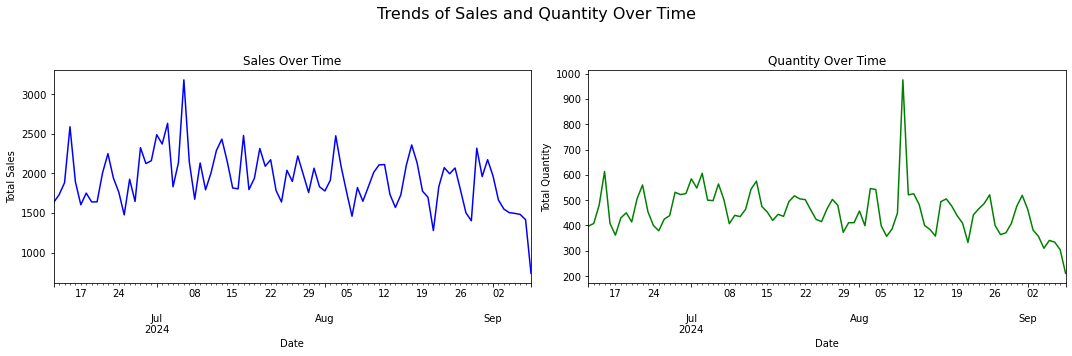

In [380]:
# aggregate data by purchase date for both FINAL_SALE and FINAL_QUANTITY
sales_over_time = clean_transactions_df.groupby('PURCHASE_DATE')['FINAL_SALE'].sum()
quantity_over_time = clean_transactions_df.groupby('PURCHASE_DATE')['FINAL_QUANTITY'].sum()

# create subplots for FINAL_SALE and FINAL_QUANTITY
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharex=True)

# plot FINAL_SALE over time
sales_over_time.plot(kind='line', ax=axes[0], color='blue', title='Sales Over Time')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Total Sales')

# plot FINAL_QUANTITY over time
quantity_over_time.plot(kind='line', ax=axes[1], color='green', title='Quantity Over Time')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Total Quantity')

plt.suptitle('Trends of Sales and Quantity Over Time', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


We did the followings:

1. Removed duplicated records of transactions.
2. Changed data type of PURCHASE_DATE and SCAN_DATE to datetime.
3. Changed data type of BARCODE to string.
4. Verified the assumption of bundled item where rows with ' ' (empty) FINAL_SALE would be the item that gifted to the users. Then fill the empty values with 0.

In [381]:
# export 4 data frames including known_products_df to csv that could be imported to data warehouse.

clean_users_df.to_csv('./data/clean/clean_users.csv', index=False)
clean_products_df.to_csv('./data/clean/clean_products.csv', index=False)
known_products_df.to_csv('./data/clean/known_products.csv', index=False)
clean_transactions_df.to_csv('./data/clean/clean_transactions.csv', index=False)

In [383]:
clean_users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype              
---  ------        --------------   -----              
 0   ID            100000 non-null  object             
 1   CREATED_DATE  100000 non-null  datetime64[ns, UTC]
 2   BIRTH_DATE    96325 non-null   datetime64[ns, UTC]
 3   STATE         100000 non-null  category           
 4   LANGUAGE      100000 non-null  category           
 5   GENDER        100000 non-null  category           
 6   AGE           96325 non-null   Int64              
 7   AGE_GROUP     100000 non-null  object             
dtypes: Int64(1), category(3), datetime64[ns, UTC](2), object(2)
memory usage: 4.2+ MB


In [130]:
clean_products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 845337 entries, 0 to 845336
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype   
---  ------          --------------   -----   
 0   CATEGORY_1      845226 non-null  category
 1   CATEGORY_2      843915 non-null  category
 2   CATEGORY_3      784774 non-null  category
 3   CATEGORY_4      67453 non-null   category
 4   MANUFACTURER    845337 non-null  object  
 5   BRAND           845337 non-null  object  
 6   BARCODE         841369 non-null  object  
 7   BARCODE_LENGTH  845337 non-null  int64   
dtypes: category(4), int64(1), object(3)
memory usage: 30.7+ MB


In [374]:
known_products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 841342 entries, 0 to 841341
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype   
---  ------          --------------   -----   
 0   CATEGORY_1      841231 non-null  category
 1   CATEGORY_2      840681 non-null  category
 2   CATEGORY_3      782629 non-null  category
 3   CATEGORY_4      67232 non-null   category
 4   MANUFACTURER    841342 non-null  object  
 5   BRAND           841342 non-null  object  
 6   BARCODE         841342 non-null  object  
 7   BARCODE_LENGTH  841342 non-null  int64   
 8   OTHER_BRAND     16 non-null      object  
dtypes: category(4), int64(1), object(4)
memory usage: 36.9+ MB


In [384]:
clean_transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49829 entries, 0 to 49828
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   RECEIPT_ID      49829 non-null  object        
 1   PURCHASE_DATE   49829 non-null  datetime64[ns]
 2   SCAN_DATE       49829 non-null  datetime64[ns]
 3   STORE_NAME      49829 non-null  object        
 4   USER_ID         49829 non-null  object        
 5   BARCODE         44094 non-null  object        
 6   FINAL_QUANTITY  49829 non-null  int64         
 7   FINAL_SALE      49829 non-null  float64       
 8   transaction_id  49829 non-null  object        
dtypes: datetime64[ns](2), float64(1), int64(1), object(5)
memory usage: 3.4+ MB


In [416]:
clean_transactions_df.PURCHASE_DATE.max()

Timestamp('2024-09-08 00:00:00')

**Data quality issue #12**: User ID and BARCODE mismatch

As shown below, there are many USER_ID mismatch between user dataset and transactions dataset, and BARCODE mismatch between product dataset and transactions dataset. That would lead to many foreign keys (ie USER_ID and BARCODE) in transactions dataset cannot reference valid primary keys in user dataset and product dataset. Therefore when I import the data into PostgreSQL server, I had to remove the foreign key constraints temporarily, which prevents us from establishing relational integrity in the database.

In [409]:
# no of unique ID in user dataset
len(set(clean_users_df.ID))

100000

In [410]:
# no of unique ID in transactions dataset
len(set(clean_transactions_df.USER_ID))

17694

In [411]:
# no of unique ID intersection between user dataset and transaction dataset
len(set(clean_users_df.ID).intersection(set(transactions_df.USER_ID)))

91

In [412]:
# no of unique BARCODE in product dataset
len(set(known_products_df.BARCODE))

841342

In [413]:
# no of unique BARCODE in transaction dataset
len(set(clean_transactions_df.BARCODE))

16762

In [414]:
# no of unique BARCODE intersection between product dataset and transaction dataset
len(set(known_products_df.BARCODE).intersection(set(clean_transactions_df.BARCODE)))

6562

In [419]:
clean_products_df[clean_products_df['BARCODE'].isnull()]

,CATEGORY_1,CATEGORY_2,CATEGORY_3,CATEGORY_4,MANUFACTURER,BRAND,BARCODE,BARCODE_LENGTH
9,Health & Wellness,NaN,NaN,NaN,CHURCH & DWIGHT,REPHRESH,NaN,-1
124,Snacks,Jerky & Dried Meat,NaN,NaN,CONAGRA,SLIM JIM,NaN,-1
147,Snacks,Crackers,Wheat Crackers,NaN,KELLANOVA,CARR'S,NaN,-1
365,Health & Wellness,Hair Care,Shampoo,NaN,UNILEVER,APOTHECARE ESSENTIALS,NaN,-1
428,Health & Wellness,Eye Care,Contact Lens Solution,NaN,BAUSCH + LOMB CORPORATION,BAUSCH + LOMB,NaN,-1
...,...,...,...,...,...,...,...,...
844855,Health & Wellness,Medicines & Treatments,NaN,NaN,RECKITT BENCKISER,CEPACOL,NaN,-1
844972,Health & Wellness,Bath & Body,NaN,NaN,RECKITT BENCKISER,QUEEN V,NaN,-1
845000,Snacks,NaN,NaN,NaN,PEPSICO,IMAGINE,NaN,-1
845019,Health & Wellness,Oral Care,NaN,NaN,BOIRON,BOIRON,NaN,-1
